## **Análise Avocado**


# Importando bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Carregando o dataset

In [2]:
file_path = "https://raw.githubusercontent.com/lcsspi/Proj-Aplic-I-E-de-casa/refs/heads/main/Dataset/avocado.csv"
avocado_data = pd.read_csv(file_path)

# Converter a coluna 'Date' para o formato datetime

In [3]:
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'])

# Estatísticas descritivas

In [4]:
print("Estatísticas descritivas:")
print(avocado_data.describe())

Estatísticas descritivas:
         Unnamed: 0                           Date  AveragePrice  \
count  18249.000000                          18249  18249.000000   
mean      24.232232  2016-08-13 23:30:43.498273792      1.405978   
min        0.000000            2015-01-04 00:00:00      0.440000   
25%       10.000000            2015-10-25 00:00:00      1.100000   
50%       24.000000            2016-08-14 00:00:00      1.370000   
75%       38.000000            2017-06-04 00:00:00      1.660000   
max       52.000000            2018-03-25 00:00:00      3.250000   
std       15.481045                            NaN      0.402677   

       Total Volume          4046          4225          4770    Total Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean   8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04  2.396392e+05   
min    8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.083858e+04  8.540700e+02  3.008780e+

# Preço médio ao longo do tempo

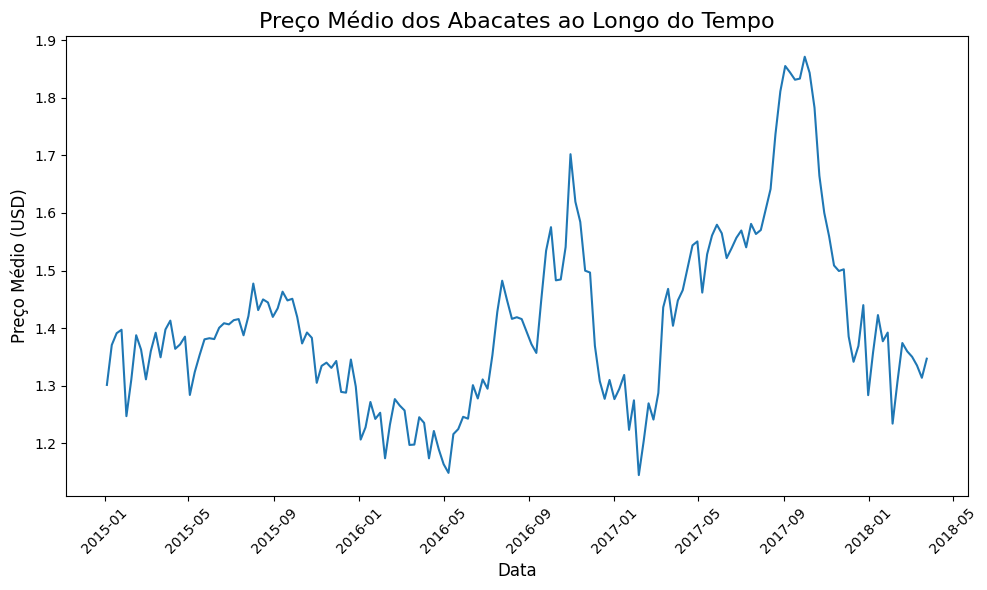

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='AveragePrice', data=avocado_data, errorbar=None)
plt.title('Preço Médio dos Abacates ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço Médio (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Distribuição do preço médio

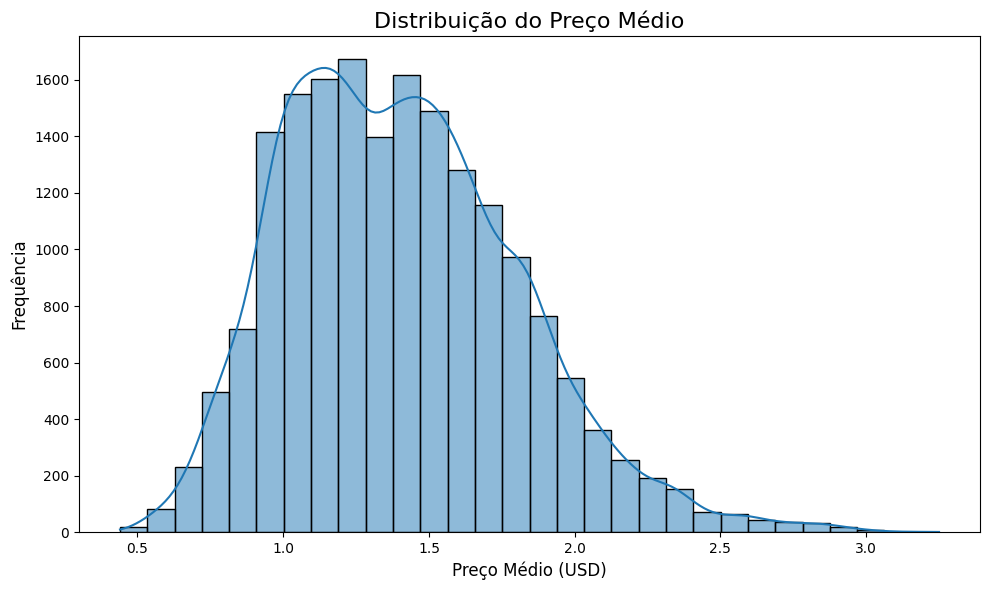

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(avocado_data['AveragePrice'], bins=30, kde=True)
plt.title('Distribuição do Preço Médio', fontsize=16)
plt.xlabel('Preço Médio (USD)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.tight_layout()
plt.show()

## Preço médio por tipo de abacate (convencional vs orgânico)

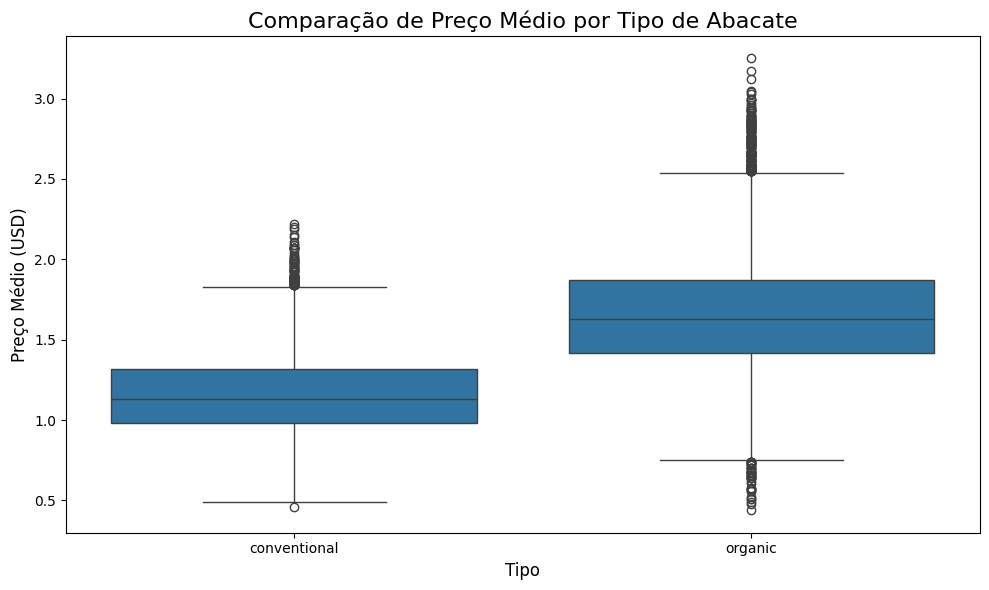

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='AveragePrice', data=avocado_data)
plt.title('Comparação de Preço Médio por Tipo de Abacate', fontsize=16)
plt.xlabel('Tipo', fontsize=12)
plt.ylabel('Preço Médio (USD)', fontsize=12)
plt.tight_layout()
plt.show()

## Volume total vendido por região

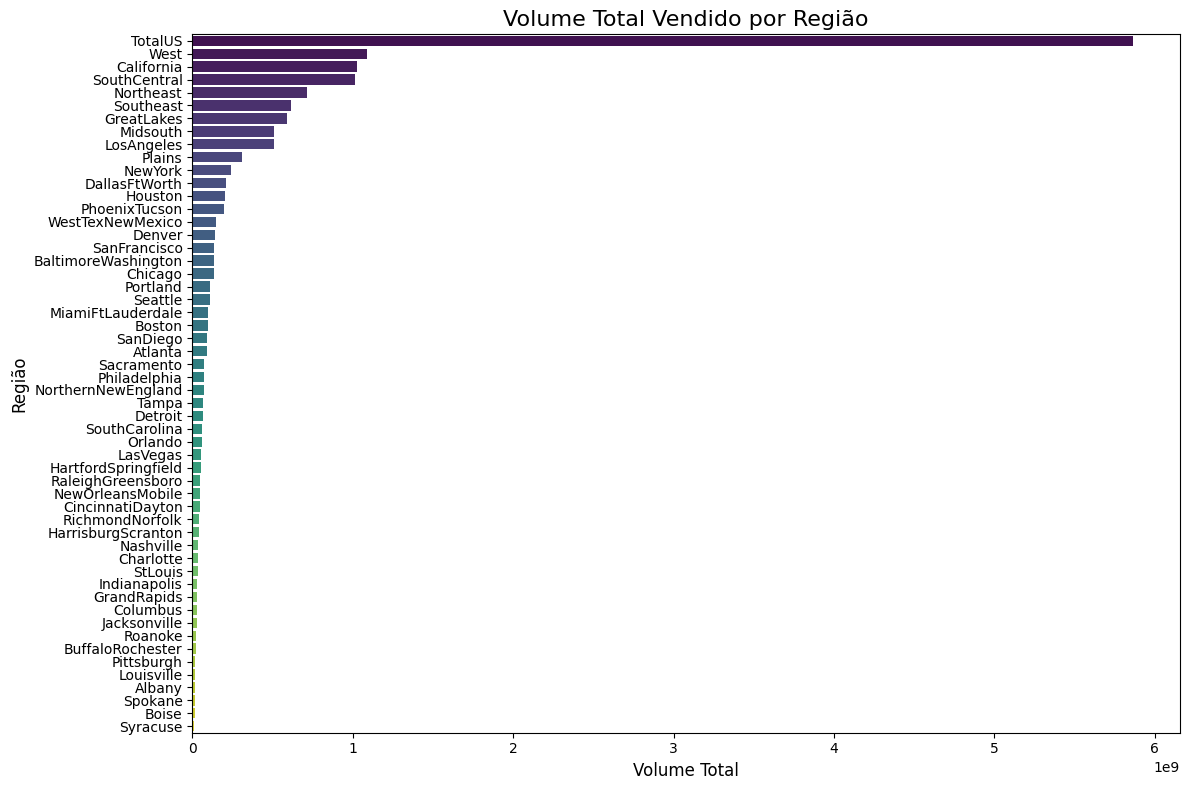

In [10]:
plt.figure(figsize=(12, 8))
region_volume = avocado_data.groupby('region')['Total Volume'].sum().sort_values(ascending=False)
sns.barplot(x=region_volume.values, y=region_volume.index, hue=region_volume.index, palette="viridis", legend=False)
plt.title('Volume Total Vendido por Região', fontsize=16)
plt.xlabel('Volume Total', fontsize=12)
plt.ylabel('Região', fontsize=12)
plt.tight_layout()
plt.show()

## Tendência do preço médio por ano

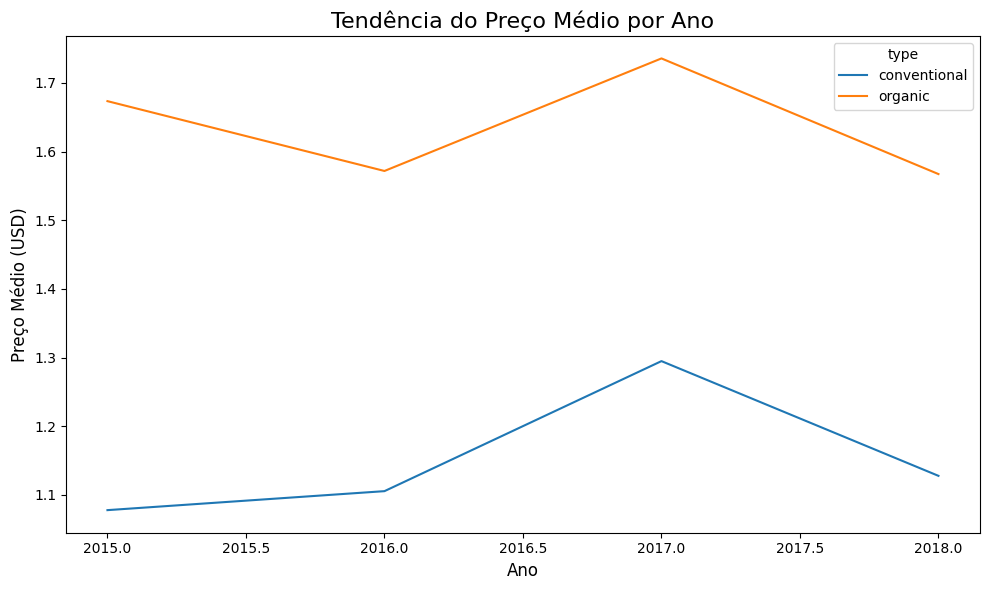

In [12]:
plt.figure(figsize=(10, 6))
avocado_data['year'] = avocado_data['Date'].dt.year
sns.lineplot(x='year', y='AveragePrice', hue='type', data=avocado_data, errorbar=None)
plt.title('Tendência do Preço Médio por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Preço Médio (USD)', fontsize=12)
plt.tight_layout()
plt.show()

## Volume total vendido por tipo de abacate

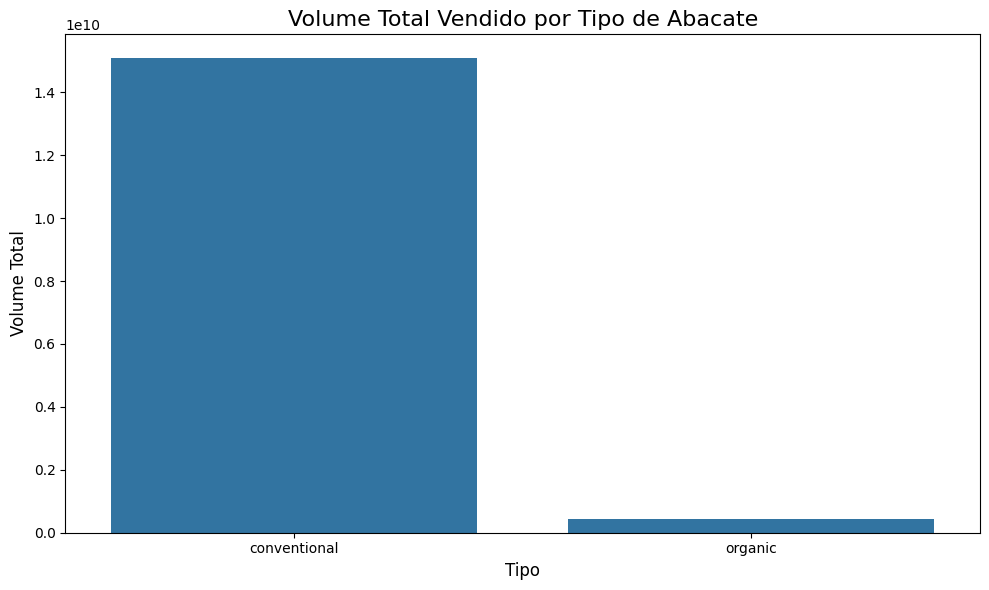

In [14]:
plt.figure(figsize=(10, 6))
type_volume = avocado_data.groupby('type')['Total Volume'].sum()
sns.barplot(x=type_volume.index, y=type_volume.values)  # Removido palette
plt.title('Volume Total Vendido por Tipo de Abacate', fontsize=16)
plt.xlabel('Tipo', fontsize=12)
plt.ylabel('Volume Total', fontsize=12)
plt.tight_layout()
plt.show()

## Correlação entre variáveis numéricas

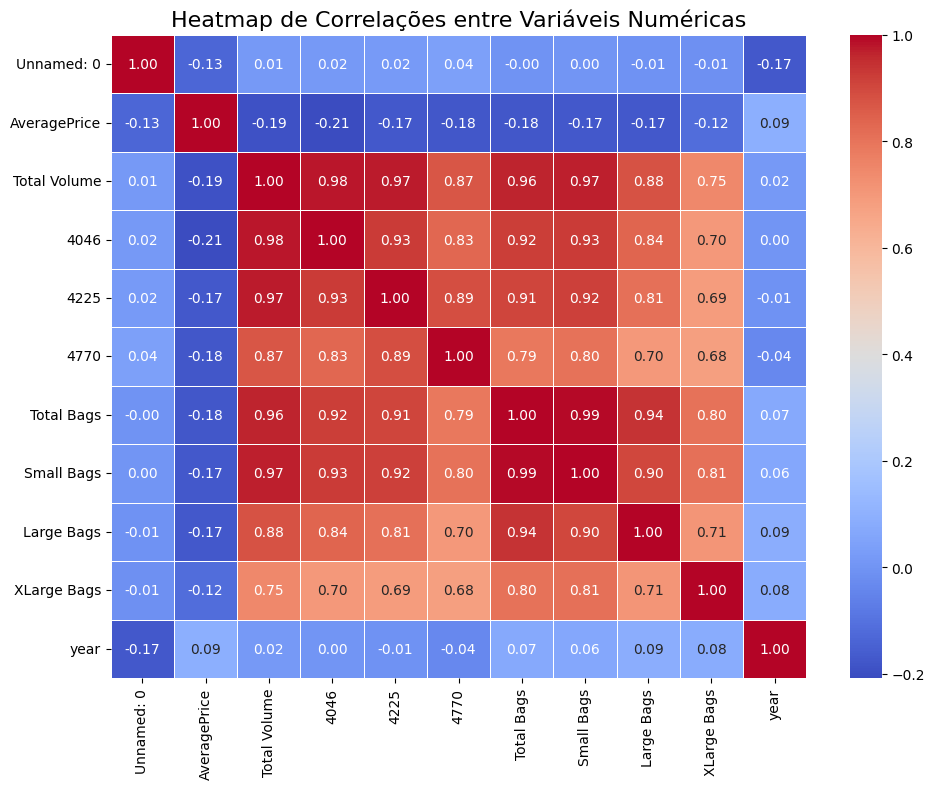

In [15]:
numeric_data = avocado_data.select_dtypes(include=[np.number])  # Seleciona apenas colunas numéricas
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de Correlações entre Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show()